Degree Centrality: [3.0, 2.0, 1.0, 1.0, 3.0, 4.0]
Clustering Coefficient: [0.3333333333333333, 1.0, 0.0, 0.0, 0.6666666666666666, 0.3333333333333333]
Betweenness Centrality: [8.0, 0.0, 0.0, 0.0, 2.0, 10.0]
PageRank Scores: [0.21345677779397276, 0.14079926976455895, 0.08314975740481925, 0.08547941866810045, 0.20346886453122345, 0.2736459118373251]


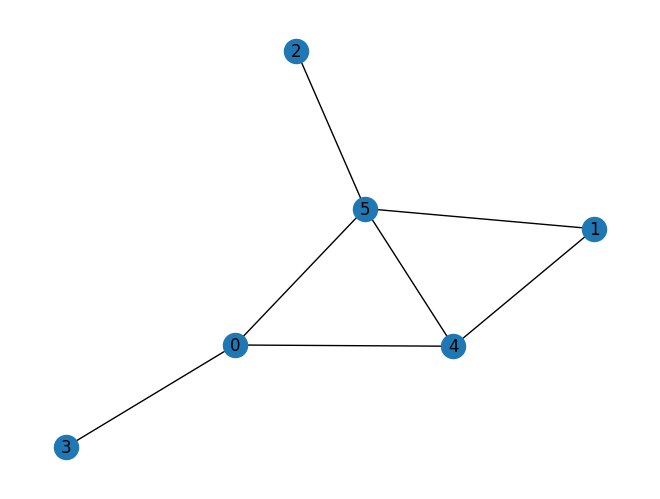

In [2]:
import rdkit
import networkx as nx
import networkit as nk
import numpy as np


def draw_graph(G: nx.Graph):
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos=pos)
    nx.draw_networkx_labels(G , pos=pos, labels={i : i for i in G.nodes})


graphs = nx.read_graph6("raw_datasets/example_graph.g6")
i = 9
graph_nk = nk.nxadapter.nx2nk(graphs[i])
graph_nx = graphs[i]

deg = nk.centrality.DegreeCentrality(graph_nk ).run()
print("Degree Centrality:", deg.scores())

# Compute clustering coefficient
clust = nk.centrality.LocalClusteringCoefficient(graph_nk ).run()
print("Clustering Coefficient:", clust.scores())

# Compute betweenness centrality
bet = nk.centrality.Betweenness(graph_nk ).run()
print("Betweenness Centrality:", bet.scores())

# Compute PageRank
pr = nk.centrality.PageRank(graph_nk, damp=0.85).run()
print("PageRank Scores:", pr.scores())

draw_graph(graph_nx)

### Jaccard Index

In [4]:
def Jaccard(graph_nk: nk.graph.Graph):
    n = graph_nk.numberOfNodes()
    result = np.zeros((n, n))
    jaccard_index_counter = nk.linkprediction.JaccardIndex(graph_nk)
    for u in range(n):
        neighbor_iter = graph_nk.iterNeighbors(u)
        for v in neighbor_iter:
            if u < v:
                value = jaccard_index_counter.run(u, v)
                result[u, v] = value
                result[v, u] = value
    return result


jaccard = Jaccard(graph_nk)

In [115]:
def local_degree_score(graph_nk: nk.graph.Graph):
    n = graph_nk.numberOfNodes()
    scorer = nk.sparsification.LocalDegreeScore(graph_nk)
    result = np.zeros((n, n))
    graph_nk.indexEdges()
    scorer.run()
    scores = scorer.scores()

    def myFunction(u, v, weight, edgeId):
        result[u, v] = scores[edgeId]
        result[v, u] = scores[edgeId]
        # print("({}, {}) -- {}".format(u, v, scores[edgeId]))

    graph_nk.forEdges(myFunction)
    return result
local_degree_score(graph_nk)

array([[0.        , 0.        , 0.        , 1.        , 0.36907025,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.36907025, 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        ]])